In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris.data, iris.target)
X = [
    [5.9, 1.0, 5.1, 1.8],
    [3.4, 2.0, 1.1, 4.8],
]
knn.predict(X)

array([1, 1])

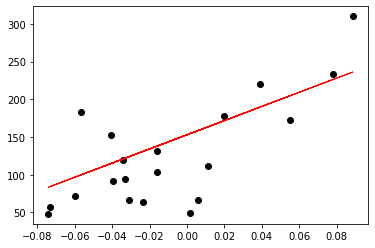

In [3]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
x = diabetes.data[:, np.newaxis, 2]
x_train = x[:-20]
x_test = x[-20:]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='red', linewidth=1)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


iris = datasets.load_iris()
x = iris.data
y = iris.target
# df = pd.DataFrame({
#     'sepal length':iris.data[:,0],
#     'sepal width':iris.data[:,1],
#     'petal length':iris.data[:,2],
#     'petal width':iris.data[:,3],
#     'species':iris.target
# })
df = pd.DataFrame(x, columns=iris.feature_names)
df['species'] = iris.target

In [42]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
temp = 0
for _ in range(100):
    temp += metrics.accuracy_score(y_test, y_pred)
temp = temp/100
print("Accuracy:", temp)
clf.predict([[3,5,4,2]]) # Predict one item

# Feature importance
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending=False)

Accuracy: 1.0


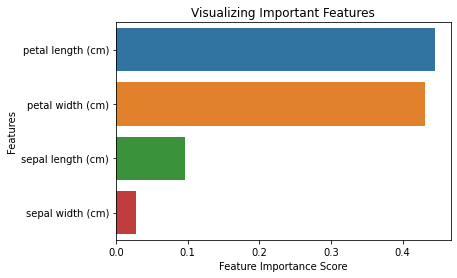

Accuracy: 0.9523809523809523


In [7]:
%matplotlib inline 
# to view output below code cell that produced it
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
# Split dataset into features and labels
# Increasing accuracy
x = df[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]  # Removed feature "sepal width"
y = df['species']                                       
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=5)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Next

In [40]:
import pandas as pd     
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
bot_comments = pd.read_csv("C:botnet_comments.csv", low_memory = False)
bot_comments.rename(columns={'reatedAt':'createdAt'},inplace=True)
bot_comments.drop(['media', 'moderationLabels', 'numReports', 'parent', 'sb','isNewUserNeedsApproval', 'isHighlighted', 'isAtFlagLimit', 'isDeletedByAuthor', 'isDeleted', 'isSpam', 'isFlagged', 'editableUntil', 'isApproved'], axis=1, inplace=True)
bot_comments['lenMessage'] = bot_comments.message.astype(str).map(lambda x: len(x))

In [10]:
all_messages = []
for message in bot_comments.message:
    if len(str(message))>0:
        sent = BeautifulSoup(str(message), "html.parser").get_text().lower()
        letters_only = re.sub("[^a-zA-Z]", " ", sent)
        all_messages.append(letters_only)
# print(all_messages)

In [11]:
words = ' '.join(all_messages).split(' ')

In [12]:
newwords = []
stops = set(stopwords.words('english'))
for w in words:
    if w not in stops and w != '':
        newwords.append(w)

In [33]:
def clean_text_data(data_point, data_size):
    if len(str(data_point))>0:
        sent = BeautifulSoup(str(data_point), "html.parser").get_text().lower()
        review_letters_only = re.sub("[^a-zA-Z]", " ", sent) 
    review_words = review_letters_only.split()
    stops = set(stopwords.words("english"))
    meaningful_words = []
    for w in review_words:
        if w not in stops and w != '':
            meaningful_words.append(w)
    if( (i)%15000 == 0 ):
        print(f"Cleaned {round(((i)/data_size)*100)}% of {data_size} data.")
        
    return( " ".join( meaningful_words))

In [34]:
temp = []

for i in range(len(bot_comments.message)):
    temp.append(clean_text_data(bot_comments.message[i], len(bot_comments.message)))

Cleaned 0% of 281357 data.
Cleaned 5% of 281357 data.
Cleaned 11% of 281357 data.
Cleaned 16% of 281357 data.
Cleaned 21% of 281357 data.
Cleaned 27% of 281357 data.
Cleaned 32% of 281357 data.
Cleaned 37% of 281357 data.
Cleaned 43% of 281357 data.
Cleaned 48% of 281357 data.
Cleaned 53% of 281357 data.
Cleaned 59% of 281357 data.
Cleaned 64% of 281357 data.
Cleaned 69% of 281357 data.
Cleaned 75% of 281357 data.
Cleaned 80% of 281357 data.
Cleaned 85% of 281357 data.
Cleaned 91% of 281357 data.
Cleaned 96% of 281357 data.


In [38]:
bot_comments['cleanedMessage'] = temp

In [41]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(x, columns=iris.feature_names)
df['species'] = iris.target
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [49]:
bot_comments['isBot'] = [True for _ in range(len(bot_comments))]

In [56]:
bot_comments.head(2)

,username,canVote,createdAt,dislikes,forum,id,isEdited,likes,message,points,lenMessage,cleanedMessage,isBot
0,patriot1970,False,2011-04-10T02:19:32,0,myfoxdetroit,181734313,False,6,"<p>Someone will definitely be fired over this,...",6,132,someone definitely fired well could seriously ...,True
1,qxyz,False,2011-03-02T05:22:53,0,myfoxdetroit,158837937,False,8,<p>your probably just mad because the only act...,8,130,probably mad action get hand sorry mised meeti...,True


In [80]:
X = bot_comments[['username', 'createdAt', 'forum', 'cleanedMessage']]
Y = bot_comments['isBot']
X_train, X_test, Y_train, Y_test = train_test_split(X['cleanedMessage'], Y, test_size = 0.3, random_state=42)

In [82]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)
X_test = vectorizer.transform(X_test)
X_test = X_test.toarray()
print(X_test.shape)

(196949, 5000)
(84408, 5000)


In [84]:
vocab = vectorizer.get_feature_names_out()
print(f"Printing first 100 vocabulary samples:\n{vocab[:100]}")

Printing first 100 vocabulary samples:
['abbott' 'abc' 'abhor' 'abiding' 'ability' 'able' 'abortion' 'abroad'
 'absolute' 'absolutely' 'absolutist' 'abu' 'abuse' 'aby' 'ac' 'academic'
 'accept' 'acceptable' 'accepted' 'access' 'accessible' 'accessories'
 'accident' 'accidents' 'according' 'account' 'accountable' 'accounting'
 'accounts' 'accurate' 'achieve' 'achieved' 'achievement' 'achieving'
 'ack' 'acne' 'acoustic' 'acquire' 'acquired' 'across' 'act' 'acting'
 'action' 'actions' 'active' 'activities' 'activity' 'actor' 'actress'
 'acts' 'actual' 'actually' 'ad' 'adam' 'add' 'added' 'addiction' 'adding'
 'addition' 'additional' 'additionally' 'address' 'adem' 'adequate'
 'administration' 'admire' 'admit' 'admitted' 'adopt' 'ads' 'adult'
 'adults' 'advance' 'advanced' 'advancement' 'advantage' 'advantages'
 'advertisement' 'advertising' 'advice' 'affair' 'affairs' 'affect'
 'affected' 'affects' 'afford' 'affordable' 'afghanistan' 'afraid'
 'africa' 'african' 'age' 'agencies' 'agency' 

In [86]:
distribution = np.sum(X_train, axis=0)
print("Printing first 20 vocab-dist pairs:")
for tag, count in zip(vocab[:20], distribution[:20]):
    print(count, tag)

Printing first 20 vocab-dist pairs:
362 abbott
251 abc
439 abhor
113 abiding
436 ability
1914 able
215 abortion
111 abroad
209 absolute
630 absolutely
398 absolutist
98 abu
528 abuse
135 aby
150 ac
166 academic
1336 accept
148 acceptable
142 accepted
712 access


In [96]:
# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(x_train.values, y_train.values)
# y_pred = clf.predict(x_test.values)
# temp = 0
# for _ in range(100):
#     temp += metrics.accuracy_score(y_test, y_pred)
# temp = temp/100
# print("Accuracy:", temp)
# clf.predict([[3,5,4,2]]) # Predict one item

# # Feature importance
# feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending=False)
forest = RandomForestClassifier() 
forest.fit(X_train, Y_train)
predictions = forest.predict(X_test) 
print(f"Accuracy: {accuracy_score(Y_test, predictions)*100}%")

Accuracy: 100.0%
